# Multivariate Regression Basics Using Premier League Football Data

### Imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Grab the Data and Clean
I scraped this data and I believe that wherever there is a n/a value, the table where I scraped the data from omits values from the table when there is no occurrence of the stat for either team.

In [93]:
df = pd.read_csv('../DataSets/Prem_2022_2023_Match_Stats')
df = df.fillna(0)

### Filter Out Columns that Do Not Contribute to the Covariance Plot. Create the Covariance Data.

In [66]:
stats = df[['Home Goals FT',
       'Away Goals FT', 'H Possession %',
       'A Possession %', 'H Shots on target', 'A Shots on target', 'H Shots',
       'A Shots', 'H Touches', 'A Touches', 'H Passes', 'A Passes',
       'H Tackles', 'A Tackles', 'H Clearances', 'A Clearances', 'H Corners',
       'A Corners', 'H Offsides', 'A Offsides', 'H Yellow cards',
       'A Yellow cards', 'H Fouls conceded', 'A Fouls conceded', 'H Red cards',
       'A Red cards']]
correlations = stats.corr()

### Plot the Covariance

Text(0.5, 1.0, 'Covariance Plot for Match Stats of 2022-2023 Premier League Data')

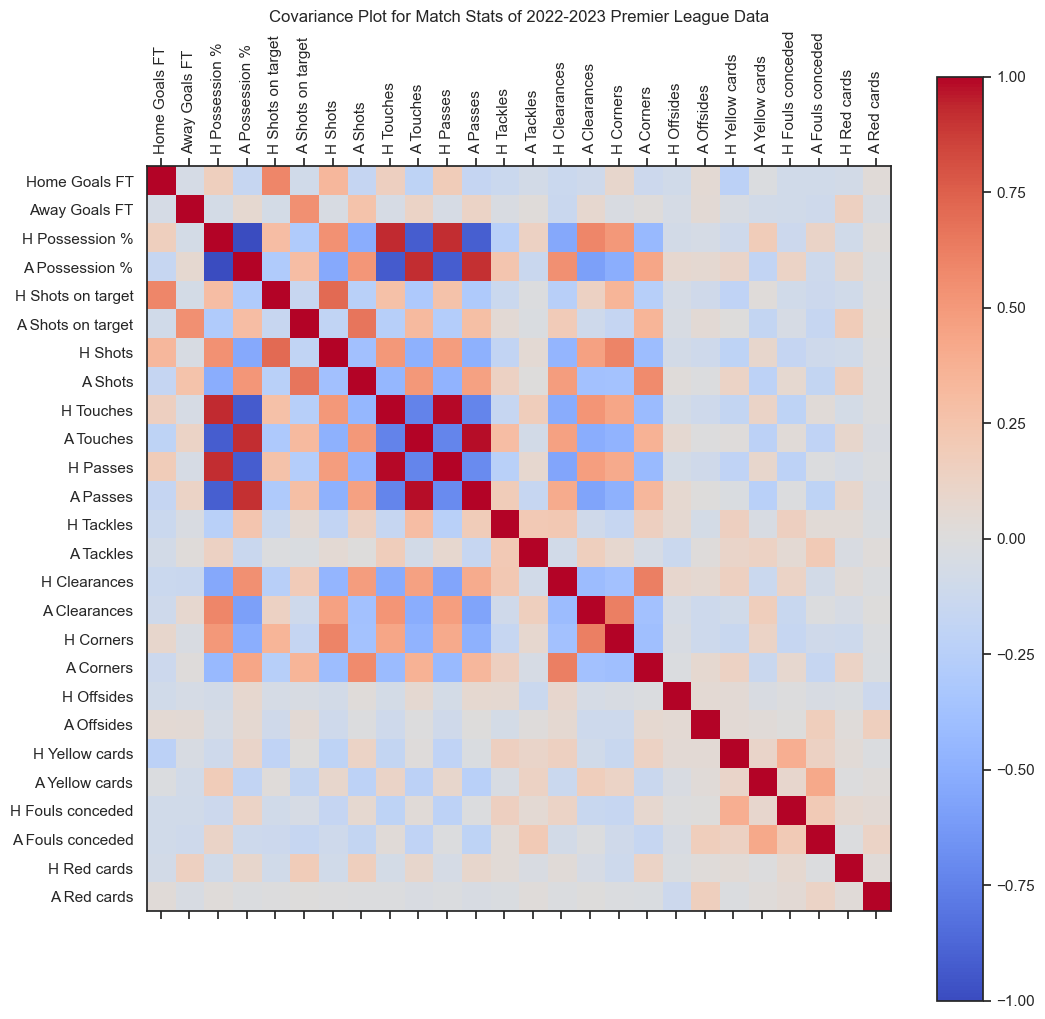

In [86]:
plt.figure(figsize=(12, 12))
plt.matshow(correlations, cmap='coolwarm', fignum=0)
plt.xticks(range(len(stats.columns)), stats.columns, rotation='vertical')
plt.yticks(range(len(stats.columns)), stats.columns)
plt.colorbar()
plt.title('Covariance Plot for Match Stats of 2022-2023 Premier League Data')

### Separate Out the Independent Variables from the Dependent Ones

In this case, we have two models, one to predict the number of home goals and one to predict the number of away goals.

In [68]:
X = stats.drop(['Home Goals FT', 'Away Goals FT'], axis=1)
y_h = stats['Home Goals FT']
y_a = stats['Away Goals FT']

### Generate the Model Via scikit-learn's LinearRegression()

In [94]:
model_h = LinearRegression()
model_h.fit(X, y_h)
model_a = LinearRegression()
model_a.fit(X, y_a)

/opt/anaconda3/envs/football/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/football/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/football/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/football/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future ver

LinearRegression()

### Use the Model to Predict on Unseen Data

#### Read the 2023-2024 Premier League Match Stats Data and Clean

In [95]:
df2 = pd.read_csv('../DataSets/Prem_2023_2024_Match_Stats')
df2 = df2.fillna(0)

#### Prepare the Data for the Model

In [96]:
stats = df2[['Home Goals FT',
       'Away Goals FT', 'H Possession %',
       'A Possession %', 'H Shots on target', 'A Shots on target', 'H Shots',
       'A Shots', 'H Touches', 'A Touches', 'H Passes', 'A Passes',
       'H Tackles', 'A Tackles', 'H Clearances', 'A Clearances', 'H Corners',
       'A Corners', 'H Offsides', 'A Offsides', 'H Yellow cards',
       'A Yellow cards', 'H Fouls conceded', 'A Fouls conceded', 'H Red cards',
       'A Red cards']]

X = stats.drop(['Home Goals FT', 'Away Goals FT'], axis=1)
y_h = stats['Home Goals FT']
y_a = stats['Away Goals FT']

#### Make the Predictions

In [ ]:
y_pred_h = model_h.predict(X)
y_pred_a = model_a.predict(X)

#### Add Predictions to DataFrame and Create Results Columns for Comparison

In [120]:
df2['Home Goals FT Prediction'] = y_pred_h
df2['Away Goals FT Prediction'] = y_pred_a

df2['Result'] = ''
df2.loc[df2['Home Goals FT'] > df2['Away Goals FT'], 'Result'] = 'H'
df2.loc[df2['Home Goals FT'] == df2['Away Goals FT'], 'Result'] = 'D'
df2.loc[df2['Home Goals FT'] < df2['Away Goals FT'], 'Result'] = 'A'

df2['Predicted Result'] = ''
df2.loc[df2['Home Goals FT Prediction'] > df2['Away Goals FT Prediction'], 'Predicted Result'] = 'H'
df2.loc[df2['Home Goals FT Prediction'] == df2['Away Goals FT Prediction'], 'Predicted Result'] = 'D'
df2.loc[df2['Home Goals FT Prediction'] < df2['Away Goals FT Prediction'], 'Predicted Result'] = 'A'

df2['Home Goals FT Prediction Rounded'] = df2['Home Goals FT Prediction'].round(0)
df2['Away Goals FT Prediction Rounded'] = df2['Away Goals FT Prediction'].round(0)

In [135]:
df2[['Date', 'Home Team', 'Away Team', 'Home Goals FT',
       'Away Goals FT', 'Home Goals FT Prediction', 'Home Goals FT Prediction Rounded', 'Away Goals FT Prediction', 'Away Goals FT Prediction Rounded']].head(10)

,Date,Home Team,Away Team,Home Goals FT,Away Goals FT,Home Goals FT Prediction,Home Goals FT Prediction Rounded,Away Goals FT Prediction,Away Goals FT Prediction Rounded
0,2023-10-29,West Ham,Everton,0,1,0.662945,1.0,1.471517,1.0
1,2023-10-29,Man Utd,Man City,0,3,0.969016,1.0,2.492118,2.0
2,2023-10-29,Liverpool,Nott'm Forest,3,0,2.625742,3.0,0.347756,0.0
3,2023-10-27,Crystal Palace,Spurs,1,2,0.041069,0.0,0.724277,1.0
4,2023-10-28,Chelsea,Brentford,0,2,0.938791,1.0,1.545712,2.0
5,2023-10-29,Brighton,Fulham,1,1,3.963142,4.0,1.038218,1.0
6,2023-10-28,Bournemouth,Burnley,2,1,1.690673,2.0,0.916789,1.0
7,2023-10-29,Aston Villa,Luton,3,1,3.249249,3.0,0.623371,1.0
8,2023-10-28,Arsenal,Sheffield Utd,5,0,3.678873,4.0,0.307945,0.0
9,2023-10-23,Spurs,Fulham,2,0,1.950173,2.0,0.877528,1.0


### Calculate Informal Model Accuracy

In [153]:
print(f"Correct Results: {round(len(df2[df2['Result'] == df2['Predicted Result']])/len(df2)*100, 2)}%")
print(f"Correct Scores: {round(len(df2[(df2['Home Goals FT'] == df2['Home Goals FT Prediction Rounded']) & (df2['Away Goals FT'] == df2['Away Goals FT Prediction Rounded'])])/len(df2)*100, 2)}%")

Correct Results: 64.65%
Correct Scores: 20.2%


Check the MSE and R2 Metrics for the Models

In [156]:
mse_h = mean_squared_error(y_h, y_pred_h)
r2_h = r2_score(y_h, y_pred_h)
mse_a = mean_squared_error(y_a, y_pred_a)
r2_a = r2_score(y_a, y_pred_a)

print("Home Goals Model:")
print(f"Mean Squared Error: {mse_h}")
print(f"R-squared: {r2_h}")
print("\nAway Goals Model:")
print(f"Mean Squared Error: {mse_a}")
print(f"R-squared: {r2_a}")

Home Goals Model:
Mean Squared Error: 1.1408066961881755
R-squared: 0.3687304409812382

Away Goals Model:
Mean Squared Error: 0.7570818661577858
R-squared: 0.5238604100223012


/opt/anaconda3/envs/football/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/football/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/football/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/football/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` i

In [83]:
import statsmodels.api as sm

In [158]:
model_h = sm.OLS(stats['Home Goals FT'], stats.drop(['Home Goals FT', 'Away Goals FT'], axis=1)).fit()
model_a = sm.OLS(stats['Away Goals FT'], stats.drop(['Home Goals FT', 'Away Goals FT'], axis=1)).fit()

In [159]:
model_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Home Goals FT   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     4.939
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           7.02e-08
Time:                        19:33:46   Log-Likelihood:                -124.12
No. Observations:                  99   AIC:                             296.2
Df Residuals:                      75   BIC:                             358.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
H Possession %        0.0520      0.055      0.946      0.347      -0.058       0.162
A Possession %       -0.0400      0.068     -0.588      0.559      -0.176       0.096
H Shots on target     0.2974      0.061      4.888      0.000       0.176       0.419
A Shots on target    -0.1096      0.067     -1.638      0.106      -0.243       0.024
H Shots              -0.0032      0.046     -0.070      0.944      -0.096       0.089
A Shots              -0.0096      0.041     -0.234      0.815      -0.091       0.072
H Touches             0.0059      0.011      0.535      0.594      -0.016       0.028
A Touches            -0.0082      0.010     -0.794      0.430      -0.029       0.012
H Passes             -0.0097      0.011     -0.874      0.385      -0.032       0.012
A Passes              0.0126      0.011      1.116      0.268      -0.010       0.035
H Tackles            -0.0088      0.030     -0.299      0.766      -0.068       0.050
A Tackles             0.0009      0.028      0.032      0.975      -0.055       0.056
H Clearances          0.0037      0.024      0.155      0.878      -0.044       0.052
A Clearances         -0.0415      0.023     -1.801      0.076      -0.087       0.004
H Corners            -0.0033      0.044     -0.076      0.940      -0.090       0.083
A Corners             0.0524      0.056      0.930      0.355      -0.060       0.165
H Offsides           -0.0734      0.067     -1.090      0.279      -0.207       0.061
A Offsides           -0.0487      0.068     -0.714      0.478      -0.184       0.087
H Yellow cards        0.1406      0.080      1.748      0.085      -0.020       0.301
A Yellow cards       -0.0427      0.095     -0.449      0.655      -0.232       0.147
H Fouls conceded      0.0442      0.046      0.965      0.338      -0.047       0.136
A Fouls conceded      0.0555      0.033      1.663      0.100      -0.011       0.122
H Red cards          -0.2142      0.359     -0.596      0.553      -0.930       0.502
A Red cards          -0.5978      0.331     -1.804      0.075      -1.258       0.062
==============================================================================
Omnibus:                        2.902   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.486
Skew:                           0.190   Prob(JB):                        0.288
Kurtosis:                       3.677   Cond. No.                     4.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Away Goals FT   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     6.836
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           9.24e-11
Time:                        19:33:47   Log-Likelihood:                -107.49
No. Observations:                  99   AIC:                             263.0
Df Residuals:                      75   BIC:                             325.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
H Possession %        0.1189      0.047      2.555      0.013       0.026       0.212
A Possession %       -0.1133      0.058     -1.969      0.053      -0.228       0.001
H Shots on target     0.0188      0.051      0.365      0.716      -0.084       0.121
A Shots on target     0.3742      0.057      6.613      0.000       0.261       0.487
H Shots              -0.0033      0.039     -0.085      0.932      -0.081       0.075
A Shots              -0.0373      0.034     -1.081      0.283      -0.106       0.031
H Touches            -0.0104      0.009     -1.123      0.265      -0.029       0.008
A Touches            -0.0042      0.009     -0.484      0.630      -0.022       0.013
H Passes             -0.0007      0.009     -0.077      0.939      -0.019       0.018
A Passes              0.0180      0.010      1.885      0.063      -0.001       0.037
H Tackles             0.0368      0.025      1.472      0.145      -0.013       0.087
A Tackles             0.0273      0.024      1.157      0.251      -0.020       0.074
H Clearances         -0.0005      0.020     -0.024      0.981      -0.041       0.040
A Clearances          0.0317      0.019      1.627      0.108      -0.007       0.070
H Corners            -0.0277      0.037     -0.754      0.453      -0.101       0.046
A Corners            -0.0507      0.048     -1.064      0.291      -0.146       0.044
H Offsides            0.0401      0.057      0.705      0.483      -0.073       0.153
A Offsides            0.0507      0.058      0.880      0.382      -0.064       0.165
H Yellow cards        0.0365      0.068      0.537      0.593      -0.099       0.172
A Yellow cards       -0.0736      0.080     -0.916      0.363      -0.234       0.086
H Fouls conceded      0.0386      0.039      0.997      0.322      -0.039       0.116
A Fouls conceded     -0.0368      0.028     -1.306      0.196      -0.093       0.019
H Red cards           0.0488      0.304      0.160      0.873      -0.556       0.654
A Red cards          -0.0434      0.280     -0.155      0.877      -0.601       0.515
==============================================================================
Omnibus:                        1.512   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                0.976
Skew:                           0.110   Prob(JB):                        0.614
Kurtosis:                       3.434   Cond. No.                     4.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""